**Input differential in convolution**

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data


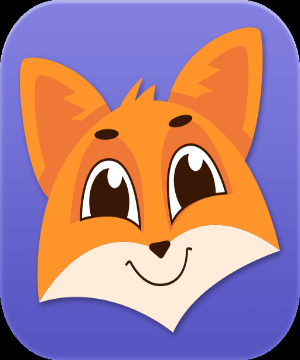

(360, 300)
kernal.shape (1, 3, 3, 3)
img_padded.shape (3, 360, 300)


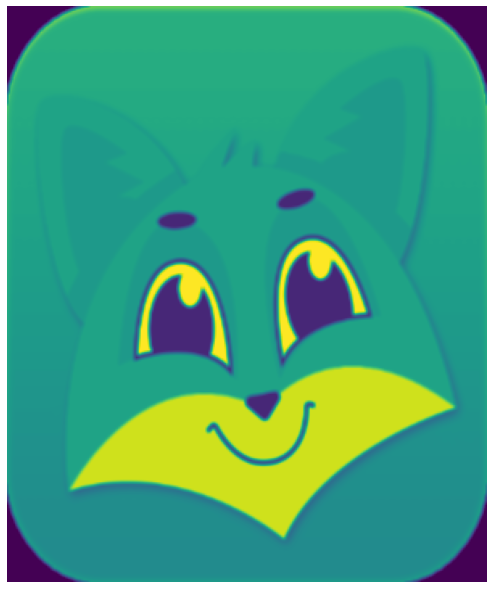

In [ ]:
#https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
#https://medium.com/theleanprogrammer/3-dimensional-convolution-7041ca7f3e81
%cd sample_data/
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

def conv_2d (input_img , height , width , kernel):
  output_matrix = []
  for i in range (0,(height - kernel_size  + 2 * padding + 1),strides):
    for j in range (0,(width - kernel_size  + 2 * padding + 1),strides):
      if(i == j == 0):
        window = input_img[i:i+kernel_size , j:j+kernel_size]
        temp = window
      else :
        # temp = np.subtract(window, input_img[i:i+kernel_size , j:j+kernel_size])
        temp = np.subtract(input_img[i:i+kernel_size , j:j+kernel_size],window)
      prod = np.multiply(temp , kernel)
      output_matrix.append(np.sum(prod))
  output_matrix = (np.array(output_matrix).reshape(out_height,out_width))
  return output_matrix

def convolution(input_map, kernal, front_delta=None, deriv=False):
  # N, C, W, H = input_map.shape#(batch,channel,w,h)
  C, W, H = img_padded.shape#(batch,channel,w,h)
  K_NUM, K_C, K_W, K_H = kernal.shape
  print('kernal.shape',kernal.shape)
  print('img_padded.shape',img_padded.shape)
  if deriv == False:
      # feature_map = np.zeros((N, K_NUM, W-K_W+1, H-K_H+1))
    feature_map = np.zeros((K_NUM, W-K_W+1, H-K_H+1))
    for kId in range(K_NUM):
        for cId in range(C):
            feature_map[kId] += \
              conv_2d(input_map[cId],W,H, kernal[kId,cId,:,:])
    return feature_map 
      # return feature_map  
      # for imgId in range(N):#we need image ID to build label array
      #     for kId in range(K_NUM):
      #         for cId in range(C):
      #             feature_map[imgId][kId] += \
      #               conv_2d(input_map[imgId][cId],W,H, kernal[kId,cId,:,:], mode='valid')
      # return feature_map    

if __name__ == '__main__':
  
  #identification
  padding = 0
  strides = 1
  kernel_size = 3
  num_filters = 1
  num_filter_channels = 3
  #image(s) dimention
  width = 300
  height = 360

  #reading image(s)
  img = cv2.imread('icon.png')
  img = cv2.resize(img,(width,height))
  cv2_imshow(img)

  #The imread function reads the pixel's values as (b,g,r) as opposed to the (r,g,b) notation
  #so we switch  (b,g,r) to (r,g,b) with code below
  #the pixels extracted from image
  pixels = []
  for i in range (height):
    for j in range (width):
      pixels.append(img[i,j])

  #RGB streams are stored in different array to facilitate the process of convlution
  b = []
  g = []
  r = []

  for i in pixels:
    b.append(i[0])
    g.append(i[1])
    r.append(i[2])

  img = np.zeros((num_filter_channels,height,width))

  img[0,:,:] = np.array(r).reshape(height,width)

  print(img[0,:,:].shape)
  img[1,:,:] = np.array(g).reshape(height,width)
  img[2,:,:] = np.array(b).reshape(height,width)

  # Apply Equal Padding to All Sides
  if padding != 0:
    img_padded = np.zeros((num_filter_channels,height + padding*2, width + padding*2))
    for i in range(num_filter_channels):
      img_padded[i,int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = img[i,:,:]
      print(img_padded[i].shape)
  else:
    img_padded = np.zeros((num_filter_channels,height,width))
    for i in range(num_filter_channels):
      img_padded[i,:,:] = img[i,:,:]


  #you can specifiy your desired channels for 3D filter(we here assume channels are b_kernel,g_kernel,r_kernel)
  #you can specifiy your desired channels for 3D picture (here we assume picture have 3 channels (r,g,b))
  #we specify the size of windows equal to size of kernels
  b_kernel = np.array([0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ]).reshape(kernel_size,kernel_size)
  g_kernel = np.array([0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ]).reshape(kernel_size,kernel_size)
  r_kernel = np.array([0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ]).reshape(kernel_size,kernel_size)

  array_filters = np.zeros((num_filters,num_filter_channels, kernel_size, kernel_size))

  #filter channels
  c = np.zeros((num_filter_channels, kernel_size, kernel_size))
  c[0,:] = r_kernel
  c[1,:] = g_kernel
  c[2,:] = b_kernel

  array_filters[0,:,:,:] = c
  #calculate 2Dconvolution
  out_height = int(((height - kernel_size + 2 * padding) / strides) + 1)
  out_width = int (((width - kernel_size + 2 * padding) / strides) + 1)

  diff_conv_img = convolution(img_padded,array_filters)
      # Plotting output images of convolution layer to compare with faulty output  
  plt.figure(figsize=(30,36))
  plt.subplot(321)
  plt.imshow(diff_conv_img.squeeze())
  plt.axis('off')
  plt.show()



**normal convolution implementation**

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data


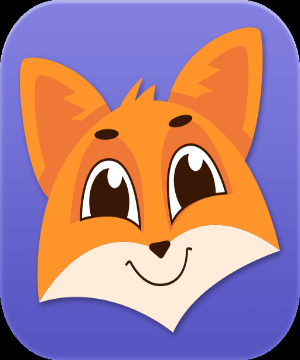

(360, 300)
kernal.shape (1, 3, 3, 3)
img_padded.shape (3, 360, 300)


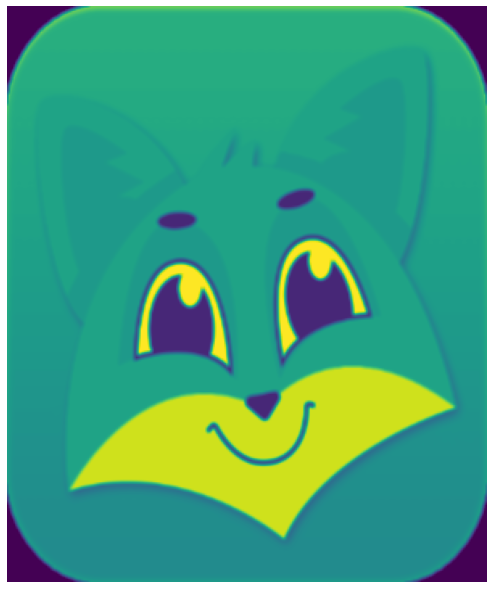

In [ ]:
#https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
#https://medium.com/theleanprogrammer/3-dimensional-convolution-7041ca7f3e81
%cd sample_data/
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def conv_2d (input_img , height , width , kernel):
  output_matrix = []
  for i in range (0,(height - kernel_size  + 2 * padding + 1),strides):
    for j in range (0,(width - kernel_size  + 2 * padding + 1),strides):
      temp = input_img[i:i+kernel_size , j:j+kernel_size] 
      prod = np.multiply(temp , kernel)
      output_matrix.append(np.sum(prod))
  output_matrix = (np.array(output_matrix).reshape(out_height,out_width))
  return output_matrix

def convolution(input_map, kernal, front_delta=None, deriv=False):
  # N, C, W, H = input_map.shape#(batch,channel,w,h)
  C, W, H = img_padded.shape#(batch,channel,w,h)
  K_NUM, K_C, K_W, K_H = kernal.shape
  print('kernal.shape',kernal.shape)
  print('img_padded.shape',img_padded.shape)
  if deriv == False:
      # feature_map = np.zeros((N, K_NUM, W-K_W+1, H-K_H+1))
    feature_map = np.zeros((K_NUM, W-K_W+1, H-K_H+1))
    for kId in range(K_NUM):
        for cId in range(C):
            feature_map[kId] += \
              conv_2d(input_map[cId],W,H, kernal[kId,cId,:,:])
    return feature_map 

if __name__ == '__main__':
  
  #identification
  padding = 0
  strides = 1
  kernel_size = 3
  num_filters = 1
  num_filter_channels = 3
  #image(s) dimention
  width = 300
  height = 360

  #reading image(s)
  img = cv2.imread('icon.png')
  img = cv2.resize(img,(width,height))
  cv2_imshow(img)

  #The imread function reads the pixel's values as (b,g,r) as opposed to the (r,g,b) notation
  #so we switch  (b,g,r) to (r,g,b) with code below
  #the pixels extracted from image
  pixels = []
  for i in range (height):
    for j in range (width):
      pixels.append(img[i,j])

  #RGB streams are stored in different array to facilitate the process of convlution
  b = []
  g = []
  r = []

  for i in pixels:
    b.append(i[0])
    g.append(i[1])
    r.append(i[2])

  img = np.zeros((num_filter_channels,height,width))

  img[0,:,:] = np.array(r).reshape(height,width)

  print(img[0,:,:].shape)
  img[1,:,:] = np.array(g).reshape(height,width)
  img[2,:,:] = np.array(b).reshape(height,width)

  # Apply Equal Padding to All Sides
  if padding != 0:
    img_padded = np.zeros((num_filter_channels,height + padding*2, width + padding*2))
    for i in range(num_filter_channels):
      img_padded[i,int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = img[i,:,:]
      print(img_padded[i].shape)
  else:
    img_padded = np.zeros((num_filter_channels,height,width))
    for i in range(num_filter_channels):
      img_padded[i,:,:] = img[i,:,:]


  #you can specifiy your desired channels for 3D filter(we here assume channels are b_kernel,g_kernel,r_kernel)
  #you can specifiy your desired channels for 3D picture (here we assume picture have 3 channels (r,g,b))
  #we specify the size of windows equal to size of kernels
  b_kernel = np.array([0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ]).reshape(kernel_size,kernel_size)
  g_kernel = np.array([0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ]).reshape(kernel_size,kernel_size)
  r_kernel = np.array([0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ]).reshape(kernel_size,kernel_size)

  array_filters = np.zeros((num_filters,num_filter_channels, kernel_size, kernel_size))

  #filter channels
  c = np.zeros((num_filter_channels, kernel_size, kernel_size))
  c[0,:] = r_kernel
  c[1,:] = g_kernel
  c[2,:] = b_kernel

  array_filters[0,:,:,:] = c
  #calculate 2Dconvolution
  out_height = int(((height - kernel_size + 2 * padding) / strides) + 1)
  out_width = int (((width - kernel_size + 2 * padding) / strides) + 1)

  simple_conv_img = convolution(img_padded,array_filters)
    # Plotting output images of convolution layer to compare with faulty output  
  plt.figure(figsize=(30,36))
  plt.subplot(321)
  plt.imshow(simple_conv_img.squeeze())
  plt.axis('off')
  plt.show()



In [ ]:
#compare two images calculate accuracy
print('diff_conv_img.shape',diff_conv_img.shape)
print('simple_conv_img.shape',simple_conv_img.shape)

err = np.sum(pow(abs((diff_conv_img.astype("float") - simple_conv_img.astype("float"))),2))
err /= float(diff_conv_img.shape[1] * diff_conv_img.shape[2])
print('accuracy',(1-err)*100,'%')

diff_conv_img.shape (1, 358, 298)
simple_conv_img.shape (1, 358, 298)
accuracy 100.0 %


**Input clustering using LSH**

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data
input image : 


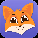

vector1 :  [[-0.07489838  0.60351821 -0.58554739  0.39060814 -0.91000028  0.19342156
  -0.3685319 ]
 [-0.17681809 -0.23817976  0.267224    0.39332219 -0.41351652 -0.04545021
   0.96533881]
 [ 0.98106297 -0.64315791  0.89937145 -0.5541953   0.87214626  0.78050155
   0.78741162]
 [ 0.32726267  0.76426422 -0.59258179  0.17615976 -0.69652487 -0.15079848
  -0.36519548]
 [-0.50969758  0.50581169  0.78122359  0.22811856 -0.17143097 -0.99951081
  -0.86996681]
 [ 0.95698375 -0.45812828 -0.15978128  0.9649524   0.77129797 -0.47938713
  -0.62005814]
 [-0.08925925 -0.93478906 -0.12784891  0.867049   -0.39872568  0.38556993
  -0.08573517]]
vector2 :  [[-0.89626665  0.58790468  0.74960796 -0.56296348 -0.11555198 -0.083694
   0.74929757]
 [ 0.40458723  0.9710506  -0.51147331  0.73464897 -0.80671628 -0.6351129
   0.25864601]
 [-0.36845924 -0.30790945  0.29654064 -0.42716934 -0.58103183  0.30289727
   0.13407849]
 [ 0.43140127  0.21986695  0.0348658   0.19920167 -0.79758899  0.63493447
  -0.87644631]
 

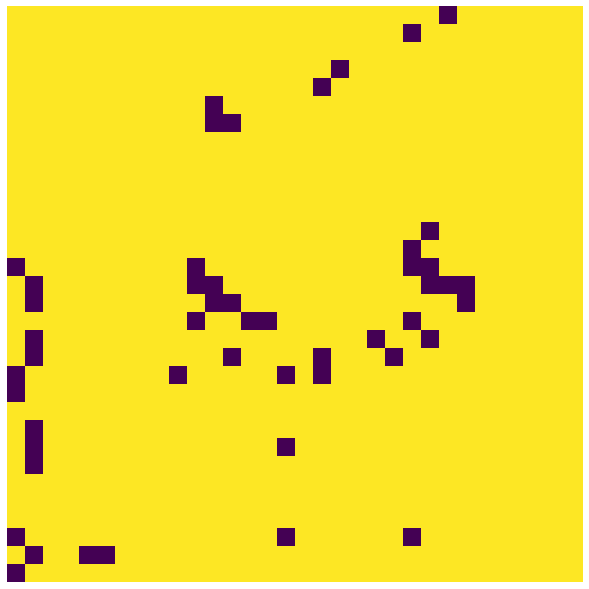

In [ ]:
#https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
#https://medium.com/theleanprogrammer/3-dimensional-convolution-7041ca7f3e81
%cd sample_data/
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

def conv_2d (input_img , height , width , kernel,channel_num):
  output_matrix = []
  for i in range (0,(height - kernel_size  + 2 * padding + 1),strides):
    for j in range (0,(width - kernel_size  + 2 * padding + 1),strides):
      window = input_img[i:i+kernel_size , j:j+kernel_size]
      prod1 = np.multiply(window , v1)
      sum1 = np.sum(prod1)
      prod2 = np.multiply(window , v2)
      sum2 = np.sum(prod2)
      cluster_number = sign_to_cluster(sum1,sum2)
      prod = np.multiply(clusters_matix[channel_num,cluster_number,:,:] , kernel)
      output_matrix.append(np.sum(prod))
  output_matrix = (np.array(output_matrix).reshape(out_height,out_width))
  return output_matrix

def convolution(input_map, kernal, front_delta=None, deriv=False):
  # N, C, W, H = input_map.shape#(batch,channel,w,h)
  C, W, H = img_padded.shape#(batch,channel,w,h)
  K_NUM, K_C, K_W, K_H = kernal.shape
  print('kernal.shape',kernal.shape)
  print('img_padded.shape',img_padded.shape)
  if deriv == False:
      # feature_map = np.zeros((N, K_NUM, W-K_W+1, H-K_H+1))
    feature_map = np.zeros((K_NUM, W-K_W+1, H-K_H+1))
    for kId in range(K_NUM):
        for cId in range(C):
            feature_map[kId] += \
              conv_2d(input_map[cId],W,H, kernal[kId,cId,:,:],cId)
    return feature_map 

if __name__ == '__main__':

  #identification
  padding = 0
  strides = 1
  kernel_size = 7
  num_filters = 1
  num_filter_channels = 3
  #image(s) dimention
  width = 38
  height = 38

  #reading image(s)
  img = cv2.imread('icon.png')
  img = cv2.resize(img,(width,height))
  print('input image : ')
  cv2_imshow(img)

  #The imread function reads the pixel's values as (b,g,r) as opposed to the (r,g,b) notation
  #so we switch  (b,g,r) to (r,g,b) with code below
  #the pixels extracted from image
  pixels = []
  for i in range (height):
    for j in range (width):
      pixels.append(img[i,j])

  #RGB streams are stored in different array to facilitate the process of convlution
  b = []
  g = []
  r = []

  for i in pixels:
    b.append(i[0])
    g.append(i[1])
    r.append(i[2])

  img = np.zeros((num_filter_channels,height,width))

  img[0,:,:] = np.array(r).reshape(height,width)
  img[1,:,:] = np.array(g).reshape(height,width)
  img[2,:,:] = np.array(b).reshape(height,width)

  # Apply Equal Padding to All Sides
  if padding != 0:
    img_padded = np.zeros((num_filter_channels,height + padding*2, width + padding*2))
    for i in range(num_filter_channels):
      img_padded[i,int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = img[i,:,:]
      print(img_padded[i].shape)
  else:
    img_padded = np.zeros((num_filter_channels,height,width))
    for i in range(num_filter_channels):
      img_padded[i,:,:] = img[i,:,:]


  #you can specifiy your desired channels for 3D filter(we here assume channels are b_kernel,g_kernel,r_kernel)
  #you can specifiy your desired channels for 3D picture (here we assume picture have 3 channels (r,g,b))
  #we specify the size of windows equal to size of kernels
  b_kernel = np.array([0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ]).reshape(kernel_size,kernel_size)
  g_kernel = np.array([0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ]).reshape(kernel_size,kernel_size)
  r_kernel = np.array([0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ]).reshape(kernel_size,kernel_size)

  #filter channels
  c = np.zeros((num_filter_channels, kernel_size, kernel_size))
  c[0,:] = r_kernel
  c[1,:] = g_kernel
  c[2,:] = b_kernel
  array_filters = np.zeros((num_filters,num_filter_channels, kernel_size, kernel_size))
  array_filters[0,:,:,:] = c

  #implementing LSH

  #defining 2 random vectors(array ellements -1 or 1)
  v1 = np.random.uniform(low=-1, high=1, size=(kernel_size,kernel_size))
  v2 = np.random.uniform(low=-1, high=1, size=(kernel_size,kernel_size))
  print('vector1 : ',v1)
  print('vector2 : ',v2)
  def sign_to_cluster(sum1,sum2):
      if (sum1 <= 0 and sum2 <= 0) :
        return 0
      elif  (sum1 <= 0 and sum2 > 0) :
        return 1
      elif  (sum1 > 0 and sum2 <= 0) :
        return 2
      else :
        return 3

  cntr_cluster_members = np.zeros((num_filter_channels,4))
  clusters_matix = np.zeros((num_filter_channels,4,kernel_size,kernel_size))

  #computing clusters
  for h in range(len(c)):
    for i in range (0,(height - kernel_size  + 2 * padding + 1),strides):
      for j in range (0,(width - kernel_size  + 2 * padding + 1),strides):  
        temp = img_padded[h,i:i+kernel_size , j:j+kernel_size]  
        prod1 = np.multiply(temp , v1)
        sum1 = np.sum(prod1)
        prod2 = np.multiply(temp , v2)
        sum2 = np.sum(prod2)
        cluster_number = sign_to_cluster(sum1,sum2) #define cluster
        clusters_matix[h,cluster_number,:,:] += np.add(temp,clusters_matix[h,cluster_number,:,:]) #add member of each class to the others
        cntr_cluster_members[h,cluster_number] +=1 #count member of each cluster

  #calculate mean in each cluster
  for h in range(len(c)):
    for i in range(4):
      print("clusters_matix : ",i,clusters_matix[h,i,:])
      print("cntr_cluster_members : ",cntr_cluster_members[h,i])
      if(cntr_cluster_members[h,i] == 0):
        cntr_cluster_members[h,i] = 1
      clusters_matix[h,i,:] = clusters_matix[h,i,:] / cntr_cluster_members[h,i]

  #calculate 2Dconvolution
  out_height = int(((height - kernel_size + 2 * padding) / strides) + 1)
  out_width = int (((width - kernel_size + 2 * padding) / strides) + 1)
  LSH_conv_img = convolution(img_padded,array_filters)

  # Plotting output images of convolution layer to compare with faulty output  
  plt.figure(figsize=(30,36))
  plt.subplot(321)
  plt.imshow(LSH_conv_img.squeeze())
  plt.axis('off')
  plt.show()



**simple little convolution**

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data
input image : 


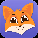

kernal.shape (1, 3, 7, 7)
img_padded.shape (3, 38, 38)


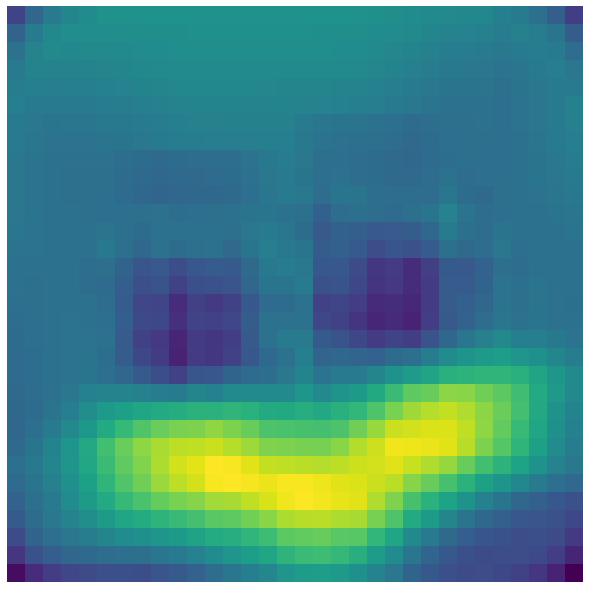

In [ ]:
#https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
#https://medium.com/theleanprogrammer/3-dimensional-convolution-7041ca7f3e81
%cd sample_data/
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

def conv_2d (input_img , height , width , kernel):
  output_matrix = []
  for i in range (0,(height - kernel_size  + 2 * padding + 1),strides):
    for j in range (0,(width - kernel_size  + 2 * padding + 1),strides):
      temp = input_img[i:i+kernel_size , j:j+kernel_size]
      prod = np.multiply(temp , kernel)
      output_matrix.append(np.sum(prod))
  output_matrix = (np.array(output_matrix).reshape(out_height,out_width))
  return output_matrix

def convolution(input_map, kernal, front_delta=None, deriv=False):

  C, W, H = img_padded.shape#(batch,channel,w,h)
  K_NUM, K_C, K_W, K_H = kernal.shape
  print('kernal.shape',kernal.shape)
  print('img_padded.shape',img_padded.shape)
  if deriv == False:
    feature_map = np.zeros((K_NUM, W-K_W+1, H-K_H+1))
    for kId in range(K_NUM):
        for cId in range(C):
            feature_map[kId] += \
              conv_2d(input_map[cId],W,H, kernal[kId,cId,:,:])
    return feature_map 

if __name__ == '__main__':
  
   #identification
  padding = 0
  strides = 1
  kernel_size = 7
  num_filters = 1
  num_filter_channels = 3
  #image(s) dimention
  width = 38
  height = 38

  #reading image(s)
  img = cv2.imread('icon.png')
  img = cv2.resize(img,(width,height))
  print('input image : ')
  cv2_imshow(img)

  #The imread function reads the pixel's values as (b,g,r) as opposed to the (r,g,b) notation
  #so we switch  (b,g,r) to (r,g,b) with code below
  #the pixels extracted from image
  pixels = []
  for i in range (height):
    for j in range (width):
      pixels.append(img[i,j])

  #RGB streams are stored in different array to facilitate the process of convlution
  b = []
  g = []
  r = []

  for i in pixels:
    b.append(i[0])
    g.append(i[1])
    r.append(i[2])

  img = np.zeros((num_filter_channels,height,width))

  img[0,:,:] = np.array(r).reshape(height,width)
  img[1,:,:] = np.array(g).reshape(height,width)
  img[2,:,:] = np.array(b).reshape(height,width)

  # Apply Equal Padding to All Sides
  if padding != 0:
    img_padded = np.zeros((num_filter_channels,height + padding*2, width + padding*2))
    for i in range(num_filter_channels):
      img_padded[i,int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = img[i,:,:]
      print(img_padded[i].shape)
  else:
    img_padded = np.zeros((num_filter_channels,height,width))
    for i in range(num_filter_channels):
      img_padded[i,:,:] = img[i,:,:]


  #you can specifiy your desired channels for 3D filter(we here assume channels are b_kernel,g_kernel,r_kernel)
  #you can specifiy your desired channels for 3D picture (here we assume picture have 3 channels (r,g,b))
  #we specify the size of windows equal to size of kernels
  b_kernel = np.array([0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ]).reshape(kernel_size,kernel_size)
  g_kernel = np.array([0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ]).reshape(kernel_size,kernel_size)
  r_kernel = np.array([0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11 ,0.11,0.11 ,0.11 ,0.11 ,0.11 ]).reshape(kernel_size,kernel_size)

  #filter channels
  c = np.zeros((num_filter_channels, kernel_size, kernel_size))
  c[0,:] = r_kernel
  c[1,:] = g_kernel
  c[2,:] = b_kernel
  array_filters = np.zeros((num_filters,num_filter_channels, kernel_size, kernel_size))
  array_filters[0,:,:,:] = c

  #calculate 2Dconvolution
  out_height = int(((height - kernel_size + 2 * padding) / strides) + 1)
  out_width = int (((width - kernel_size + 2 * padding) / strides) + 1)

  simple_little_conv_img = convolution(img_padded,array_filters)
      # Plotting output images of convolution layer to compare with faulty output  
  plt.figure(figsize=(30,36))
  plt.subplot(321)
  plt.imshow(simple_little_conv_img.squeeze())
  plt.axis('off')
  plt.show()



In [ ]:
#compare two images calculate accuracy
print('LSH_conv_img.shape',LSH_conv_img.shape)
print('simple_little_conv_img.shape',simple_little_conv_img.shape)
#MSE
err = np.sum(pow(abs((LSH_conv_img.astype("float") - simple_little_conv_img.astype("float"))),2))
err /= float(simple_conv_img.shape[1] * simple_conv_img.shape[2])
if(err == float('inf')):
  print('accuracy',0,'%')
else:
   print('accuracy',(1-err)*100,'%')

LSH_conv_img.shape (1, 32, 32)
simple_little_conv_img.shape (1, 32, 32)
accuracy 0 %


<ipython-input-57-f97629058bf5>:5: RuntimeWarning: overflow encountered in square
  err = np.sum(pow(abs((LSH_conv_img.astype("float") - simple_little_conv_img.astype("float"))),2))
